# A weird dice example

This will be a simple example to give us a feel for how interference or "negative probabilities" can make a difference. We will start by considering a pair of dice. Each die can take on the values 1 to 6 with a certain probability. For this example, we're going to look at how the 2 dice behave together. Let's start by writing a function for the probability of seeing the combination $$(i, j)$$ with $$1 \leq i, j \leq 6.$$ First we'll import the relevant packages.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Next we'll write the function $diceProb$ which takes a pair $(i, j)$ and returns the probability of seeing that particular combination.

In [5]:
def diceProb(i, j):
    return 1/36

When playing games with dice, like say Monopoly, we generally care about the sum of the values of the two dice. Or, rather, we care about the probability of the dice summing to particular values. Let's now write a function to compute this. As we all know, to compute the probability of seeing the sum (or roll) $d$, we need to add up the probabilities of all combinations $(i, j)$ such that $i + j = d$.

In [6]:
def distProb(d):
    prob = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j == d:
                prob += diceProb(i, j)
    return prob

Let's plot the results.

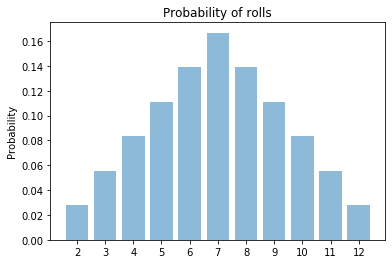

In [7]:
vals = np.array(list(map(distProb, range(2, 13))))
vals = vals / sum(abs(vals))
y_pos = np.arange(len(vals))

plt.bar(y_pos, vals, align='center', alpha=0.5)
plt.xticks(y_pos, range(2, len(vals) + 2))
plt.ylabel('Probability')
plt.title('Probability of rolls')

plt.show()

As expected, we find that 7 is the most likely roll and as we move away from 7 to either low or high values the probability decreases.

We're now going to do something apparently crazy. We're going to change $diceProb$ so that if $i > j$ the "probability" is $-1/36$, otherwise it will be $1/36$ as before. On its surface this makes no sense. What does it mean to have negative probability? In the context of quantum mechanics we can make sense of this by associating an amplitude to each event, since amplitudes can be both positive and negative numbers. For now, we'll just imagine that the weird dice respect this rule and recompute the probability of seeing a particular distance as before.

In [4]:
def wDiceProb(i, j):
    if i > j:
        return -1/36
    return 1/36

Writing out the distance function and plotting out the results, we get

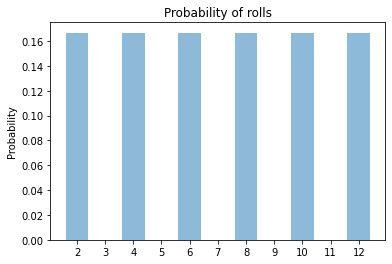

In [5]:
def distProb(d):
    prob = 0
    for i in range(1, 7):
        for j in range(1, 7):
            if i + j == d:
                prob += wDiceProb(i, j)
    return prob

vals = np.array(list(map(distProb, range(2, 13))))
vals = vals / sum(abs(vals))
y_pos = np.arange(len(vals))

plt.bar(y_pos, vals, align='center', alpha=0.5)
plt.xticks(y_pos, range(2, len(vals) + 2))
plt.ylabel('Probability')
plt.title('Probability of rolls')

plt.show()

As we can see, the probability distribution has changed. The odd distances never occur now because of cancellation when we compute their probabilities. On the other hand, the even distances occur with equal probability given by $Pr(d/2, d/2)$. This is interference! If we were to be handed this distribution and told that it was the result of rolling a pair of dice, one conclusion we could draw is that the dice have to always be correlated. In other words, the interference of different outcomes has made it so that the dice are now perfectly correlated.